In [68]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the data
data = pd.read_csv('iris-with-answers.csv')
# Check the data
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [70]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [71]:
data['species'] = data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Set input and target data

In [72]:
data.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

Features are at 3 levels. Logistic regression works on binary features

In [73]:
mask = data['species'].isin([2])
data_binary = data[~mask]
data_binary.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000,0.500000
std,0.641698,0.476057,1.448565,0.566288,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


In [74]:
x = data_binary[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data_binary['species']


#### Scale the data

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(data=x_scaled, columns=x.columns.values)
x_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.581066,0.857135,-1.014360,-1.038248
1,-0.894309,-0.198450,-1.014360,-1.038248
2,-1.207552,0.223784,-1.083741,-1.038248
3,-1.364174,0.012667,-0.944978,-1.038248
4,-0.737687,1.068253,-1.014360,-1.038248
...,...,...,...,...
95,0.358663,-0.198450,0.928326,0.736535
96,0.358663,-0.409567,0.928326,0.914013
97,1.141771,-0.409567,0.997708,0.914013
98,-0.581066,-1.254036,0.095747,0.559057


In [76]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)


LogisticRegression()

In [77]:

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [78]:
logreg.coef_

array([[ 0.82647008, -1.08218951,  1.46778308,  1.48734234]])

In [81]:
new_data = pd.concat([x_scaled, y], axis=1)
new_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.581066,0.857135,-1.014360,-1.038248,0
1,-0.894309,-0.198450,-1.014360,-1.038248,0
2,-1.207552,0.223784,-1.083741,-1.038248,0
3,-1.364174,0.012667,-0.944978,-1.038248,0
4,-0.737687,1.068253,-1.014360,-1.038248,0
...,...,...,...,...,...
95,0.358663,-0.198450,0.928326,0.736535,1
96,0.358663,-0.409567,0.928326,0.914013,1
97,1.141771,-0.409567,0.997708,0.914013,1
98,-0.581066,-1.254036,0.095747,0.559057,1


In [97]:
# x_cons = sm.add_constant(x_scaled)
reg_log = smf.logit('species ~ sepal_length', new_data)
reg_log.fit()
log_result = reg_log.fit()
log_result.summary()

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.5368
Time:                        14:33:57   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2913      0.327      0.891      0.373      -0.349       0.932
sepal_length     3.2820      0.643      5.107      0.000       2.022       4.542
================================================================================
"""

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = new_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
variables2 = new_data[['sepal_length', 'sepal_width', 'petal_width']]
vif = pd.DataFrame()
vif2 = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif2['VIF'] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif['features'] = variables.columns
vif2['features'] = variables2.columns
print(vif)
vif2


         VIF      features
0   4.835380  sepal_length
1   2.594214   sepal_width
2  36.282553  petal_length
3  25.099298   petal_width


,VIF,features
0,3.456534,sepal_length
1,1.896382,sepal_width
2,4.839973,petal_width


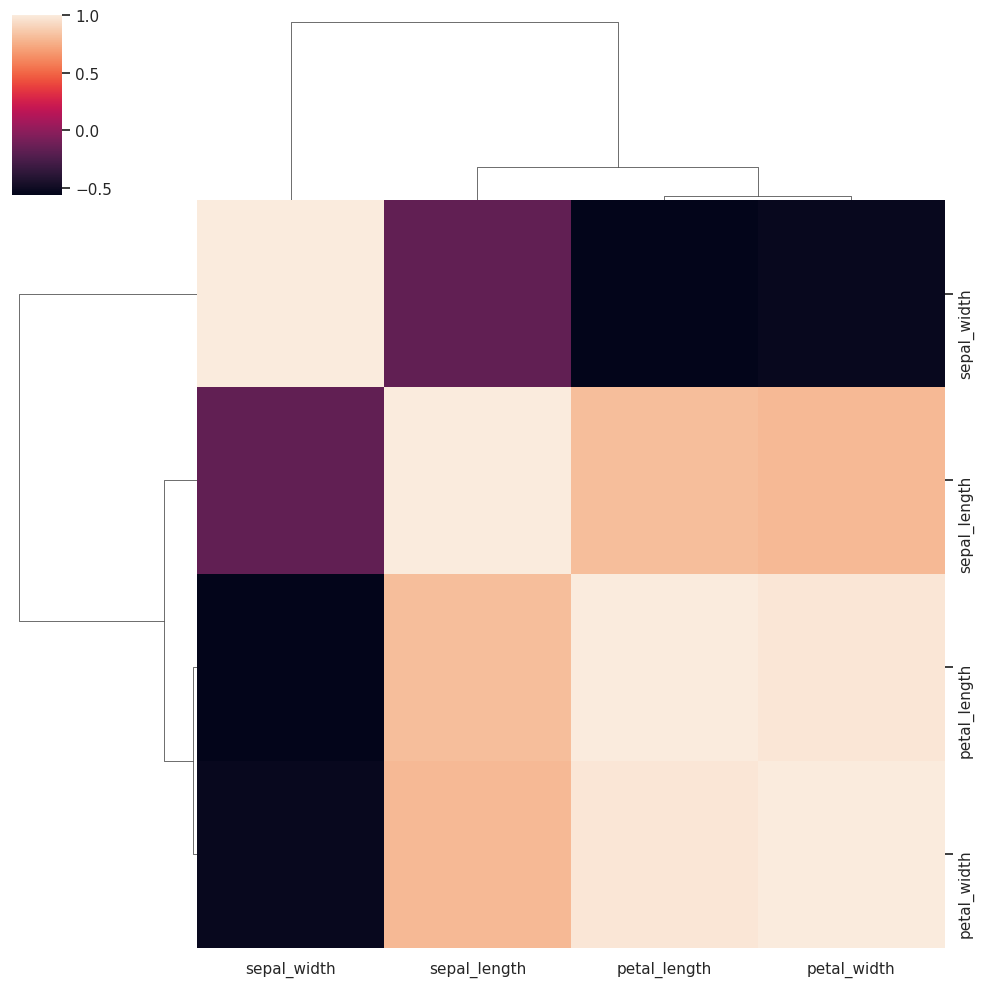

In [101]:
sns.clustermap(X_train.corr())